In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

Larissa Prochnow

# Aufgabe 1

In [17]:
phi = np.array([12,22,25,38,46,72,77,86,135])
phi_err = np.array([2,4,5,6,7,10,12,16,18])
y = np.sin(phi * np.pi / 180 /2)
y_err = np.cos(phi * np.pi / 180 /2) * phi_err * np.pi / 180 /2 #gaussian error propagation
n = np.arange(1,10)


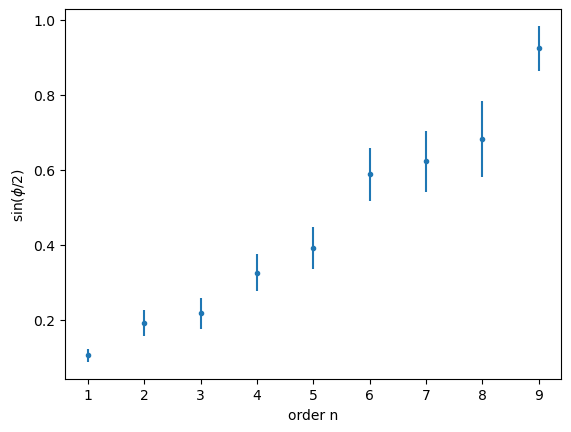

In [30]:
plt.plot(n,y, '.', label='measurement')
plt.errorbar(n,y,yerr=y_err, fmt='none', label='measurement uncertainty')
plt.xlabel('order n')
ylabel = '$\sin(\phi/2)$'
plt.ylabel(ylabel)
#plt.legend()
plt.show()

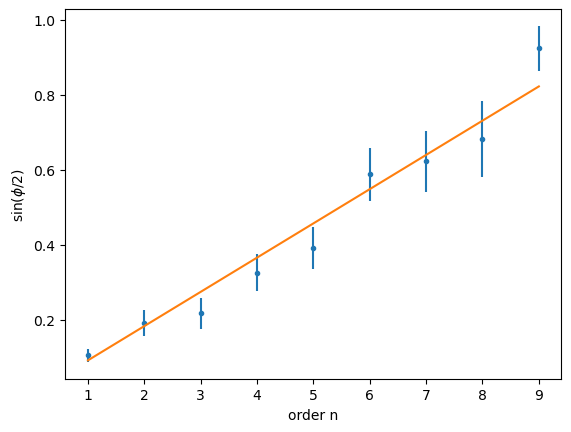

d = ( 0.3889853583271311 +/- 0.01383644148765511  ) 10^(-9) m


In [98]:
plt.plot(n,y, '.')
plt.errorbar(n,y,yerr=y_err, fmt='none')
plt.xlabel('order n')
ylabel = '$\sin(\phi/2)$'
plt.ylabel(ylabel)


def model(n, d):
    return 0.0711/(2*d)*n
popt,pcov = curve_fit(model,n,y)
plt.plot(n, model(n, *popt))
plt.show()

d = popt[0]
perr = np.sqrt(np.diag(pcov))[0]
print('d = (', d,'+/-',perr,' ) 10^(-9) m')

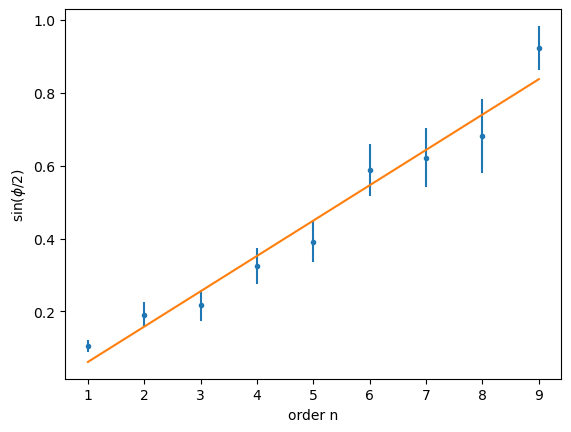

d = ( 0.366158918175747 +/- 0.027063582124102592 ) 10^(-9) m
intercept = -0.036083384742033174 for possible systematic error


In [97]:
#alternative model with offset

plt.plot(n,y, '.')
plt.errorbar(n,y,yerr=y_err, fmt='none')
plt.xlabel('order n')
ylabel = '$\sin(\phi/2)$'
plt.ylabel(ylabel)


def model(n, d, b):
    return 0.0711/(2*d)*n +b
popt,pcov = curve_fit(model,n,y)
plt.plot(n, model(n, *popt))
plt.show()

d = popt[0]
perr = np.sqrt(np.diag(pcov))[0]
print('d = (', d,'+/-',perr,') 10^(-9) m')
print('intercept =', popt[1], 'for possible systematic error')

# Aufgabe 2

$\left[ {\begin{array}{cc}
    \sigma_V^2 + S^2 & S^2 \\
    S^2 & \sigma_R^2 (+ S^2) \\
  \end{array} } \right]
= \left[ {\begin{array}{cc}
    0.3^2 + 0.2^2 & 0.2^2 \\
    0.2^2 & 0.2**2 \\
  \end{array} } \right]
  = \left[ {\begin{array}{cc}
    0.13 & 0.04 \\
    0.04 & 40000 \\
  \end{array} } \right]$


  $I = \frac{V}{R}$

In [114]:
V = 12
R = 10 * 10**(3)
I = V/R
I_u = np.sqrt( 0.13 / R**2 + 40000* V**2 / R**4 )
print('I = (',I,'+/-',I_u,') A')

I = ( 0.0012 +/- 4.331281565541543e-05 ) A


# Aufgabe 3

numpy.random.normal documentation:

Draw random samples from a normal (Gaussian) distribution.

random.normal(loc=0.0, scale=1.0, size=None)

 - loc: mean
 - scale: Standard deviation (spread or “width”) 
 - size: Output shape



In [42]:
m1 = np.random.normal(170,10,10)

numpy.random.uniform documentation:

Draw samples from a uniform distribution.

random.uniform(low=0.0, high=1.0, size=None)

- low, high: Lower and upper boundary of the output interval.
- size: Output shape

In [43]:
m2 = np.random.uniform(170-10,170+10,10)

In [104]:
def experiment(v): 
    
    mean = []
    median = []
    geometric_mean = []
    mode = []
    
    for i in range(1000):
        if v == 'm1': 
            m = np.random.normal(170,10,10)
        elif v == 'm2': 
            m = np.random.uniform(170-10,170+10,10)
        mean.append(np.mean(m))
        median.append(np.median(m))
        geometric_mean.append(stats.gmean(m))
        mode.append(stats.mode(m, keepdims = False)[0])
    return 'variance:', np.var(mean), np.var(median), np.var(geometric_mean), np.var(mode), 'bias:', np.mean(mean)-170, np.mean(median)-170, np.mean(geometric_mean)-170, np.mean(mode)-170

In [105]:
experiment('m1')

('variance:',
 10.331574684891038,
 14.261558204937508,
 10.387784937008808,
 34.97976423759715,
 'bias:',
 -0.020116339852648935,
 0.028582246056060967,
 -0.285413345340487,
 -15.444340288614967)

In [106]:
experiment('m2')

('variance:',
 3.516432589420492,
 8.03425159903972,
 3.512460166435928,
 2.5289278724428703,
 'bias:',
 0.020086218700924974,
 0.10027419100805446,
 -0.0686842064525024,
 -8.243311653746105)